<a href="https://colab.research.google.com/github/reaz31/SeaLevelRepo/blob/main/Reaz_A1_MSDS458.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
# Helper libraries
import datetime
from packaging import version
import matplotlib as mpl  # EA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
import numpy as np
import pandas as pd

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.datasets import mnist
#from plot_keras_history import plot_history

#Set Up


In [66]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

In [102]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

In [68]:
print('x_train:\t{}'.format(x_train.shape))
print('y_train:\t{}'.format(y_train.shape))
print('x_test:\t\t{}'.format(x_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


#Convert the labels (integers 0 to 9) to 1D numpy arrays of shape (10,) with elements 0s and 1s.
# Reshape the Data

In [69]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print("First ten entries of y_train:\n {}\n".format(y_train[0:10]))
print("First ten rows of one-hot y_train:\n {}".format(y_train_encoded[0:10,]))

First ten entries of y_train:
 [5 0 4 1 9 2 1 3 1 4]

First ten rows of one-hot y_train:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [70]:
print('y_train_encoded shape: ', y_train_encoded.shape)
print('y_test_encoded shape: ', y_test_encoded.shape)

y_train_encoded shape:  (60000, 10)
y_test_encoded shape:  (10000, 10)


Reshape to 1D arrays
Reshape the images from shape (28, 28) 2D arrays to shape (784, ) vectors (1D arrays).


Each element in an image is a pixel value
Pixel values range from 0 to 255

0 = White

255 = Black


In [71]:
np.set_printoptions(linewidth=np.inf)
print("{}".format(x_train[2020]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 167 208  19   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  13 235 254  99   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  74 254 234   4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 154 254 145   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 224 254  92   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  51 245 211  13   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2 169 254 101   0   0   0   0   0   

In [72]:
# Before reshape:
print('x_train:\t{}'.format(x_train.shape))
print('x_test:\t\t{}'.format(x_test.shape))

x_train:	(60000, 28, 28)
x_test:		(10000, 28, 28)


In [73]:
# Reshape the images:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

# After reshape:
print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)


In [86]:
#Rescale the elements between [0 and 1]
X_train = x_train_reshaped.astype('float32') / 255
X_test = x_test_reshaped.astype('float32') / 255

Compare Reshape and Normalized Images


In [87]:

print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [88]:
print(set(X_test[0]))

{0.0, 0.32941177, 0.5921569, 0.7254902, 0.62352943, 0.23529412, 0.14117648, 0.87058824, 0.99607843, 0.94509804, 0.7764706, 0.6666667, 0.20392157, 0.2627451, 0.44705883, 0.28235295, 0.3254902, 0.99215686, 0.81960785, 0.07058824, 0.08627451, 0.9137255, 1.0, 0.9411765, 0.9490196, 0.08235294, 0.9254902, 0.41568628, 0.88235295, 0.8901961, 0.6392157, 0.98039216, 0.8980392, 0.54901963, 0.06666667, 0.25882354, 0.05490196, 0.23137255, 0.003921569, 0.8117647, 0.29411766, 0.9843137, 0.85882354, 0.3019608, 0.5058824, 0.93333334, 0.9764706, 0.52156866, 0.73333335, 0.019607844, 0.8039216, 0.972549, 0.03529412, 0.7137255, 0.8666667, 0.011764706, 0.8784314, 0.07450981, 0.12156863, 0.4509804, 0.17254902, 0.24313726, 0.22745098, 0.22352941, 0.13725491, 0.6509804, 0.14901961, 0.49411765, 0.23921569, 0.15686275, 0.4745098, 0.79607844}


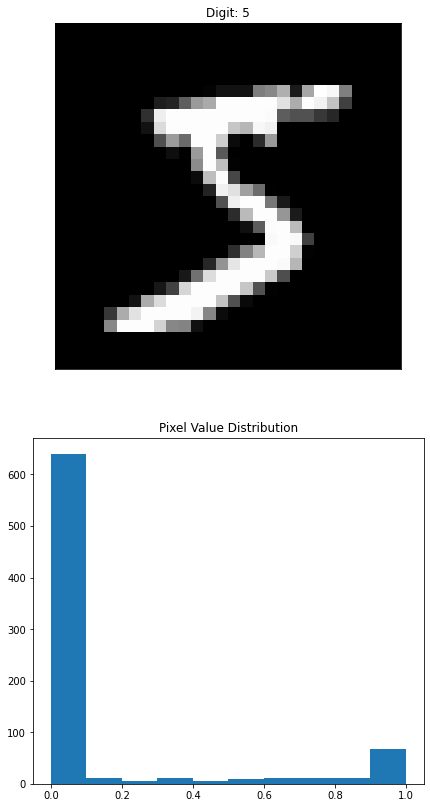

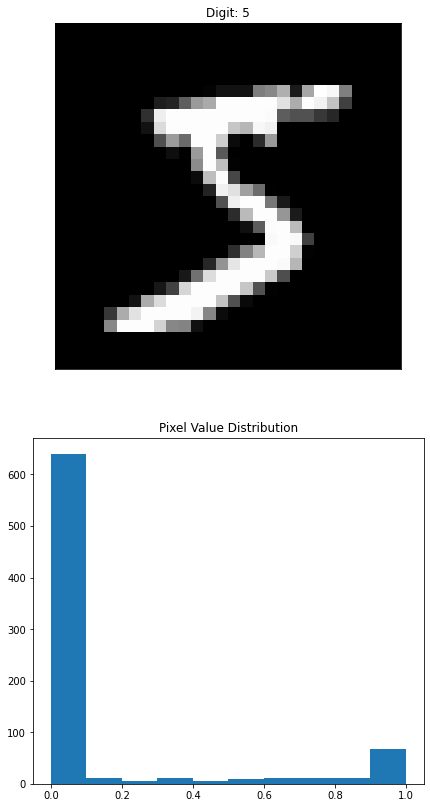

In [141]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

#Graph Distribution of Pixel Value

#Experiment 1

Our dense neural network will consist of 784 input nodes, a hidden layer with 1 node and 10 output nodes (corresponding to the 10 digits). We use mnist.load_data() to get the 70,000 images divided into a set of 60,000 training images and 10,000 test images. We hold back 5,000 of the 60,000 training images for validation. After training the model, we group the 60,000 activation values of the hidden node for the (original) set of training images by the 10 labels of the images that generated them and visualize these sets of values using a boxplot. We expect to see substantial overlap between the range of values in the "boxes" reflecting the fact that the activation values of the hidden node are not able to discriminate between the classes. In addition, we find the pattern that maximally activates the hidden node as a "warm up" exercise for similar analysis we will perform on CNN models in Assignment 2.

In [89]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [91]:
from keras.utils import np_utils

In [92]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [124]:
# building a linear stack of layers with the sequential model
model1 = Sequential()
model1.add(Dense(512, input_shape=(784,)))
model1.add(Activation('relu'))                            
model1.add(Dropout(0.2))

model1.add(Dense(10))
model1.add(Activation('softmax'))

In [125]:
# compiling the sequential model
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [127]:
history1 = model1.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))


Epoch 1/20
469/469 - 3s - loss: 0.0098 - accuracy: 0.9968 - val_loss: 0.0678 - val_accuracy: 0.9821
Epoch 2/20
469/469 - 3s - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.0618 - val_accuracy: 0.9840
Epoch 3/20
469/469 - 3s - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0685 - val_accuracy: 0.9834
Epoch 4/20
469/469 - 3s - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0674 - val_accuracy: 0.9831
Epoch 5/20
469/469 - 3s - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.0677 - val_accuracy: 0.9832
Epoch 6/20
469/469 - 3s - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.0715 - val_accuracy: 0.9837
Epoch 7/20
469/469 - 3s - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0816 - val_accuracy: 0.9807
Epoch 8/20
469/469 - 3s - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0690 - val_accuracy: 0.9840
Epoch 9/20
469/469 - 3s - loss: 0.0053 - accuracy: 0.9985 - val_loss: 0.0785 - val_accuracy: 0.9827
Epoch 10/20
469/469 - 3s - loss: 0.0063 - accuracy: 0.9977 - val_loss: 0.0797 - val_accuracy: 0.9821

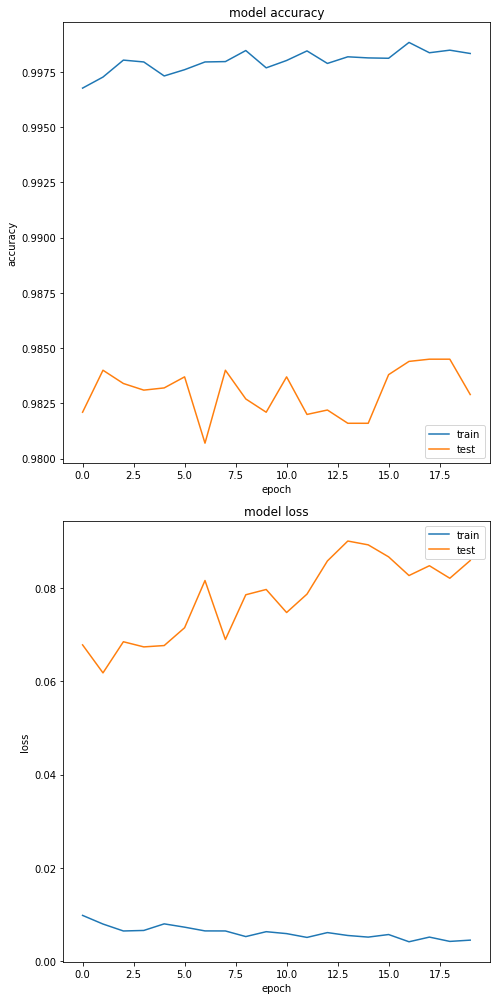

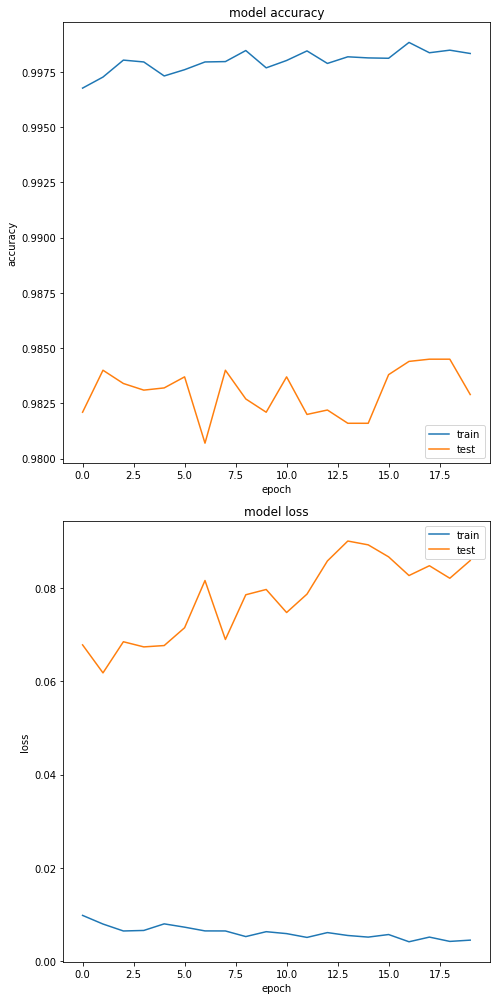

In [130]:

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [131]:
mnist_model = model1
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0859 - accuracy: 0.9829
Test Loss 0.0858767032623291
Test Accuracy 0.9829000234603882


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



9829  classified correctly
171  classified incorrectly


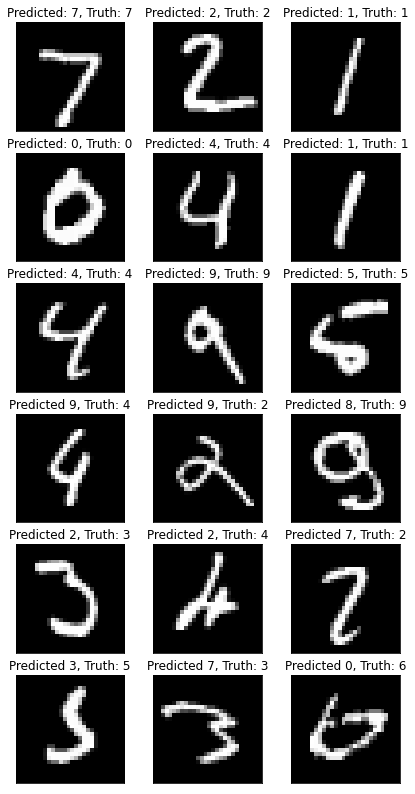

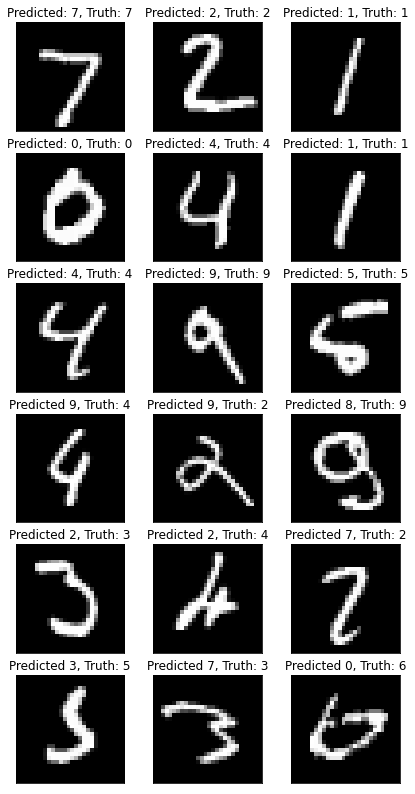

In [146]:
# load the model and create predictions on the test set
mnist_model1 = model1
predicted_classes = mnist_model1.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

#EXPERIMENT 2: 
This time our dense neural network will have 784 input nodes, a hidden layer with 2 nodes and 10 output nodes (corresponding to the 10 digits). For each of the 60,000 images, the output of the two hidden nodes are plotted using a scatterplot. We color code the points according to the class label of the image . Just like in EXPERIMENT 1, the color clusters should have substantial overlap. Also compare the accuracy % & confusion matrix of Experiments 1 & 2. Again, the goal is to get more insights.

In [134]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [135]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [136]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))




Epoch 1/20
469/469 - 7s - loss: 0.2502 - accuracy: 0.9243 - val_loss: 0.1201 - val_accuracy: 0.9630
Epoch 2/20
469/469 - 6s - loss: 0.1032 - accuracy: 0.9687 - val_loss: 0.0774 - val_accuracy: 0.9754
Epoch 3/20
469/469 - 6s - loss: 0.0717 - accuracy: 0.9776 - val_loss: 0.0677 - val_accuracy: 0.9791
Epoch 4/20
469/469 - 6s - loss: 0.0576 - accuracy: 0.9814 - val_loss: 0.0728 - val_accuracy: 0.9789
Epoch 5/20
469/469 - 6s - loss: 0.0458 - accuracy: 0.9850 - val_loss: 0.0852 - val_accuracy: 0.9745
Epoch 6/20
469/469 - 6s - loss: 0.0374 - accuracy: 0.9880 - val_loss: 0.0650 - val_accuracy: 0.9806
Epoch 7/20
469/469 - 6s - loss: 0.0351 - accuracy: 0.9883 - val_loss: 0.0646 - val_accuracy: 0.9830
Epoch 8/20
469/469 - 6s - loss: 0.0301 - accuracy: 0.9897 - val_loss: 0.0785 - val_accuracy: 0.9804
Epoch 9/20
469/469 - 6s - loss: 0.0273 - accuracy: 0.9908 - val_loss: 0.0682 - val_accuracy: 0.9815
Epoch 10/20
469/469 - 6s - loss: 0.0240 - accuracy: 0.9917 - val_loss: 0.0693 - val_accuracy: 0.9816

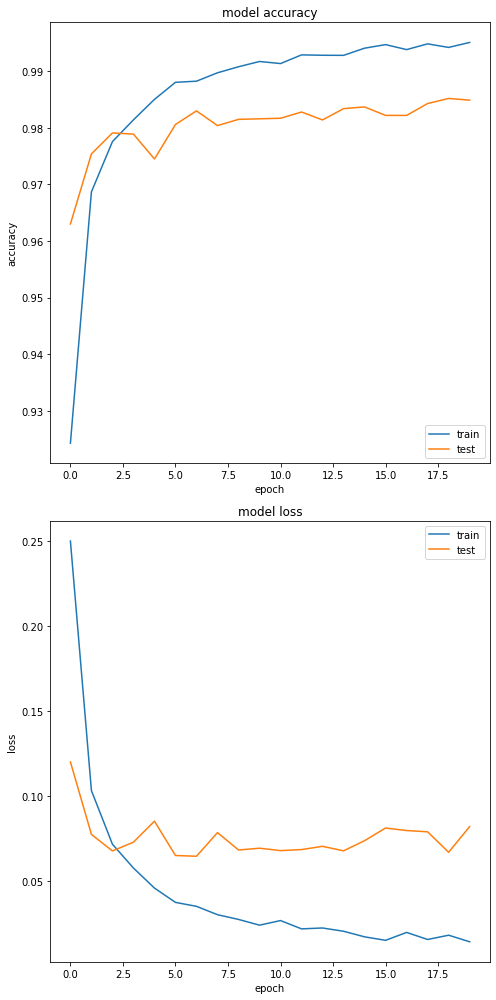

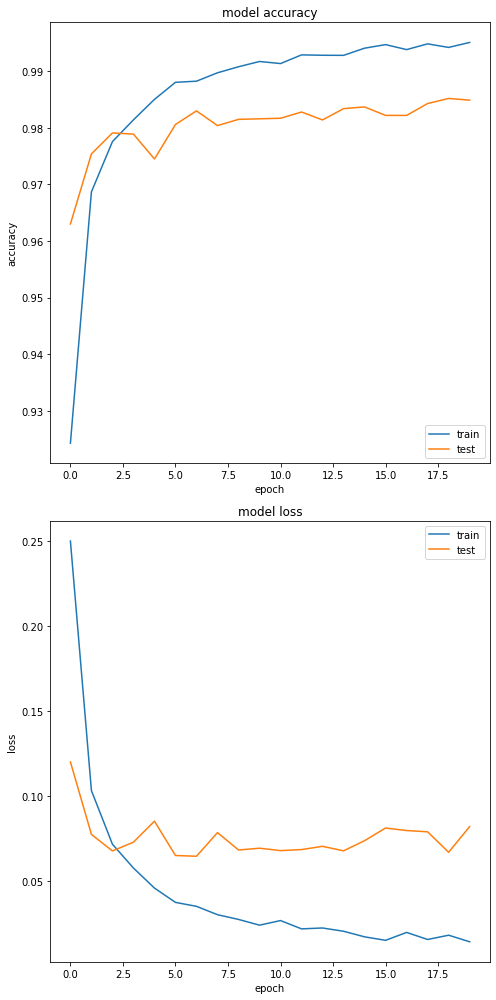

In [137]:

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [138]:
mnist_model = model
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0820 - accuracy: 0.9849
Test Loss 0.08202755451202393
Test Accuracy 0.9848999977111816


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



9849  classified correctly
151  classified incorrectly


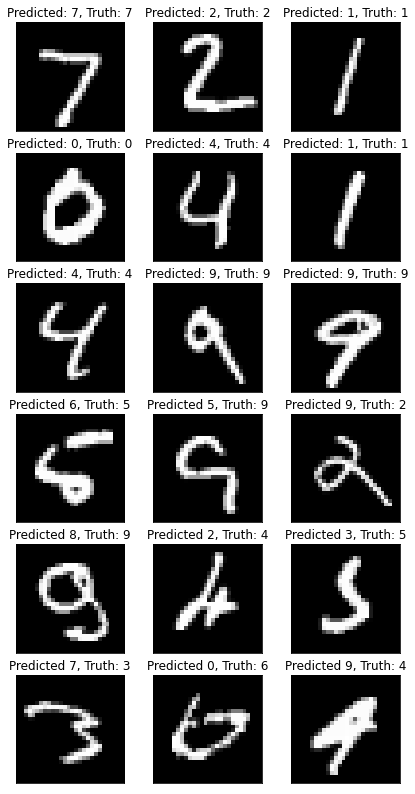

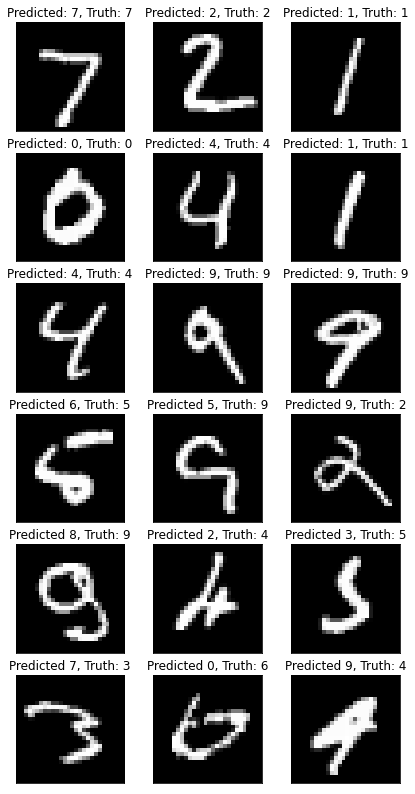

In [139]:
# load the model and create predictions on the test set
mnist_model = model
predicted_classes = mnist_model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

Looking at a few example that the dataset produces.

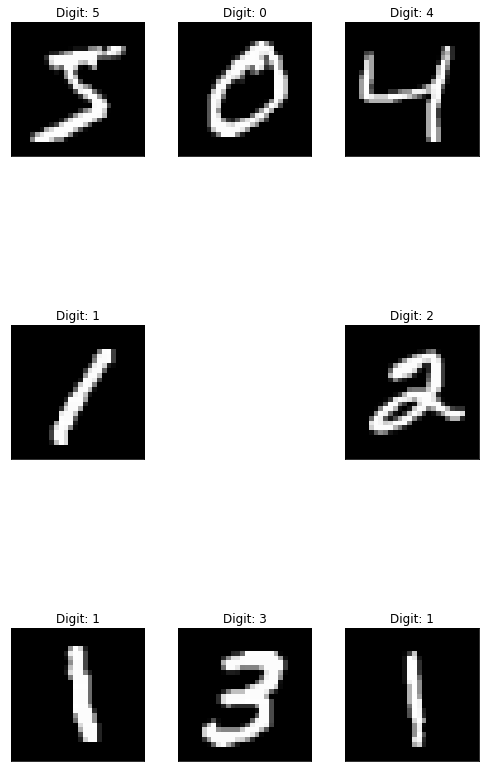

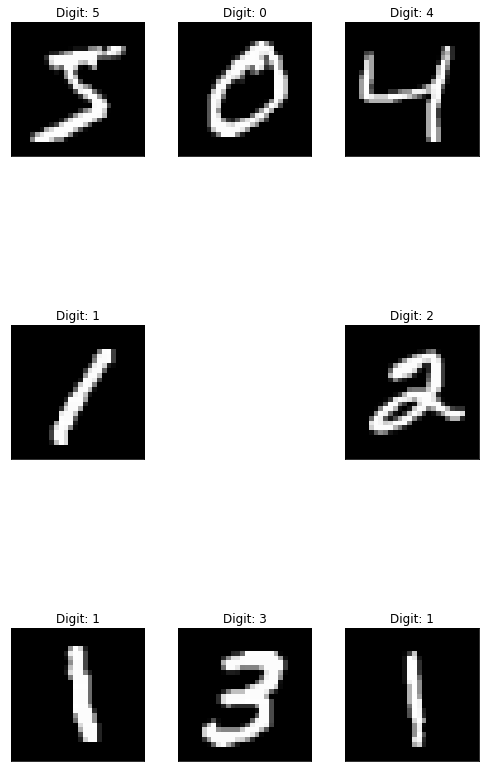

In [140]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

#Experiment 3
I can explore with more hidden nodes. Then end up with 1 ‘final’ model. Say the ‘best’ model. So here I will be taking one step further and adding three hidden layers, and further comparing accuracy scores.

In [157]:
# building a linear stack of layers with the sequential model
model3 = Sequential()
model3.add(Dense(512, input_shape=(784,)))
model3.add(Activation('relu'))                            
model3.add(Dropout(0.2))

model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.2))

model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.2))

model3.add(Dense(10))
model3.add(Activation('softmax'))

In [158]:
# compiling the sequential model
model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [160]:
history = model3.fit(X_train, Y_train,
          batch_size=256, epochs=50,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/50
235/235 - 8s - loss: 0.0467 - accuracy: 0.9856 - val_loss: 0.0572 - val_accuracy: 0.9816
Epoch 2/50
235/235 - 8s - loss: 0.0375 - accuracy: 0.9878 - val_loss: 0.0585 - val_accuracy: 0.9818
Epoch 3/50
235/235 - 8s - loss: 0.0355 - accuracy: 0.9887 - val_loss: 0.0610 - val_accuracy: 0.9806
Epoch 4/50
235/235 - 7s - loss: 0.0306 - accuracy: 0.9901 - val_loss: 0.0663 - val_accuracy: 0.9785
Epoch 5/50
235/235 - 8s - loss: 0.0282 - accuracy: 0.9905 - val_loss: 0.0664 - val_accuracy: 0.9820
Epoch 6/50
235/235 - 8s - loss: 0.0268 - accuracy: 0.9911 - val_loss: 0.0632 - val_accuracy: 0.9822
Epoch 7/50
235/235 - 7s - loss: 0.0251 - accuracy: 0.9919 - val_loss: 0.0631 - val_accuracy: 0.9834
Epoch 8/50
235/235 - 7s - loss: 0.0216 - accuracy: 0.9930 - val_loss: 0.0659 - val_accuracy: 0.9837
Epoch 9/50
235/235 - 7s - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0715 - val_accuracy: 0.9820
Epoch 10/50
235/235 - 7s - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0759 - val_accuracy: 0.9807

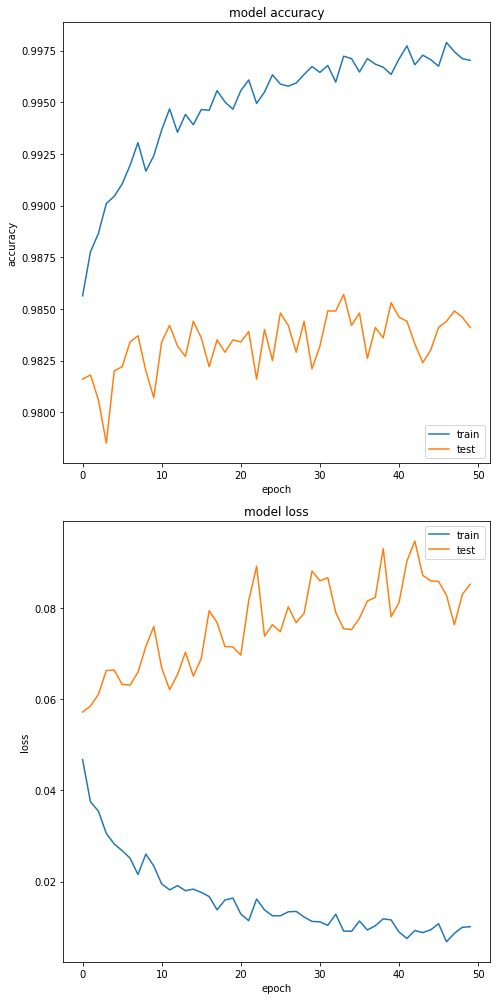

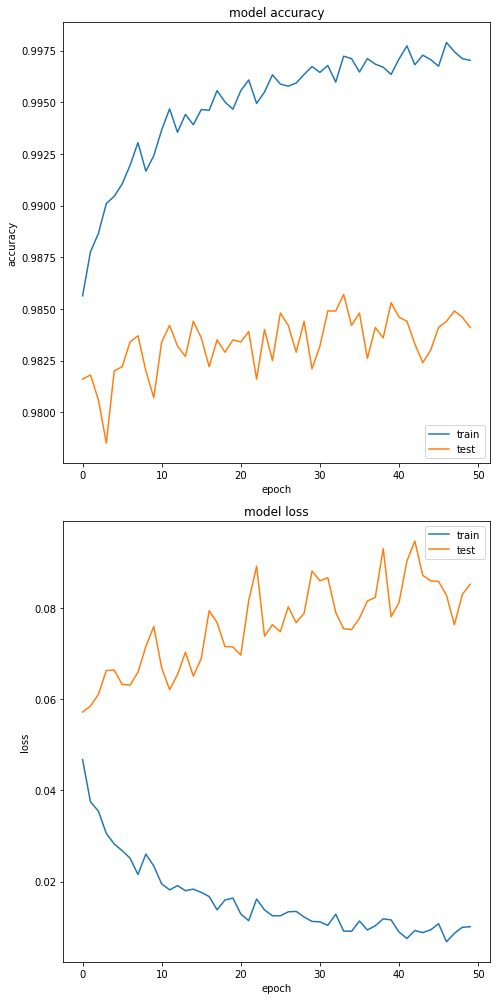

In [161]:

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [162]:
mnist_model = model3
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0852 - accuracy: 0.9841
Test Loss 0.08517578989267349
Test Accuracy 0.9840999841690063


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



9841  classified correctly
159  classified incorrectly


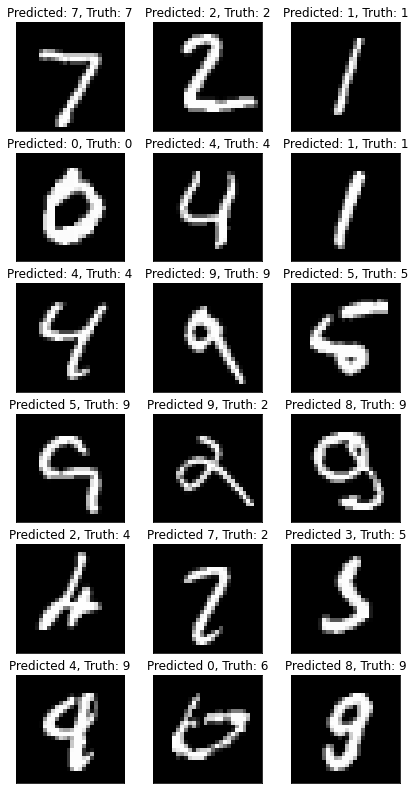

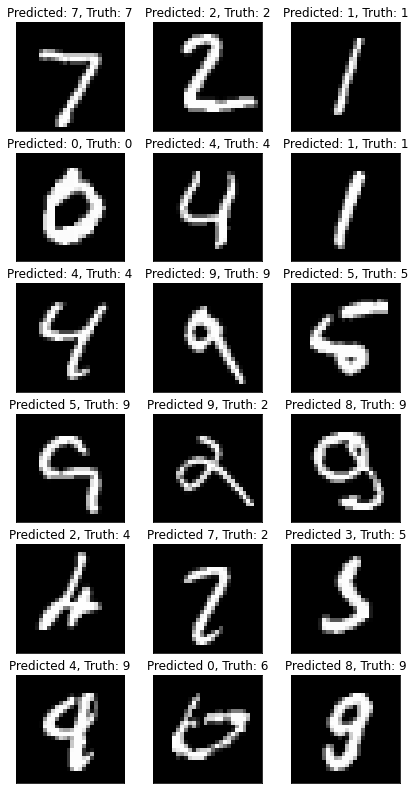

In [163]:
# load the model and create predictions on the test set
mnist_model3 = model3
predicted_classes = mnist_model3.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

#Experiment 4

Use PCA decomposition to reduce the number of dimensions of our training set of 28x28 dimensional MNIST images from 784 to 154 (with 95% of training images variance lying along these components). We also reduce the number of dimensions of 'best' model from Experiment 3 to 154 inputs nodes and train it on the new lower dimensional data. We then compare the performance of Experiments 3 and 4.

In [182]:
#Get the dataframe of all the pixel values
pixel_data = {'actual_class':y_train}
for k in range(0,128): 
    pixel_data[f"pix_val_{k}"] = x_train_norm[:,k]
pixel_df = pd.DataFrame(pixel_data)
pixel_df.head(15).round(3).T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.0,0.0,4.0,1.0,9.0,2.0,1.000,3.0,1.0,4.0,3.000,5.0,3.0,6.000,1.0
pix_val_0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0
pix_val_1,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0
pix_val_2,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0
pix_val_3,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pix_val_123,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.165,0.0,0.0,0.000,0.0
pix_val_124,0.0,0.0,0.0,0.0,0.0,0.0,0.569,0.0,0.0,0.0,0.463,0.0,0.0,0.000,0.0
pix_val_125,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.0,0.0,0.859,0.0,0.0,0.090,0.0
pix_val_126,0.0,0.0,0.0,0.0,0.0,0.0,0.827,0.0,0.0,0.0,0.651,0.0,0.0,0.773,0.0


In [185]:
features = [*pixel_data][1:] # ['pix_val_0', 'pix_val_1',...]
x = pixel_df.loc[:, features].values 

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [186]:
pixel_pca_df = pd.concat([principalDf, pixel_df[['actual_class']]], axis = 1)

In [190]:
pixel_pca_df.head().round(3)

,principal component 1,principal component 2,actual_class
0,-0.332,0.035,5
1,-0.246,-0.044,0
2,-0.332,0.035,4
3,-0.332,0.035,1
4,-0.332,0.035,9


In [187]:

pca.explained_variance_ratio_

array([0.403, 0.164], dtype=float32)

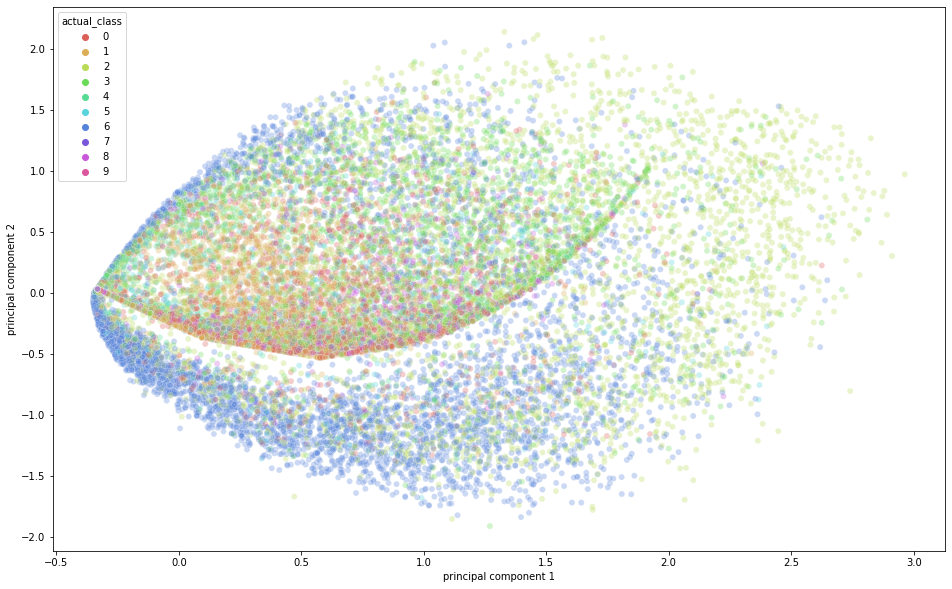

In [188]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="actual_class",
    palette=sns.color_palette("hls", 10),
    data=pixel_pca_df,
    legend="full",
    alpha=0.3
);

In [201]:
scaler = StandardScaler()
scaler.fit(X_train)
X_sc_train = scaler.transform(X_train)
X_sc_test = scaler.transform(X_test)

Text(0, 0.5, 'Cumulative explained variance')

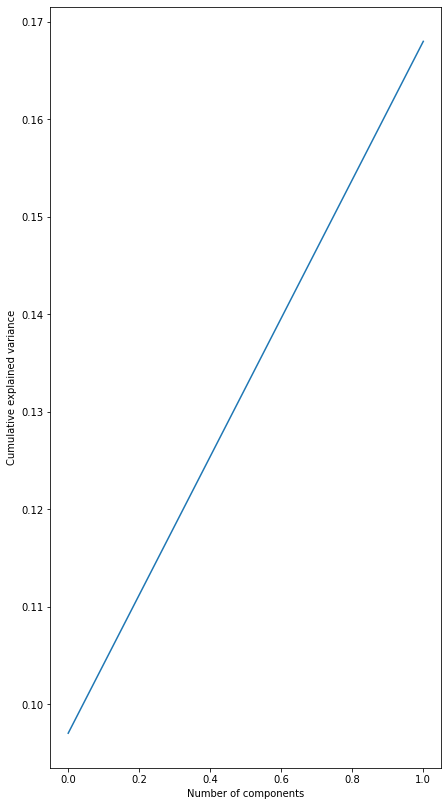

In [202]:
pca = PCA(n_components=2)
pca.fit(x_train_reshaped)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [203]:
NCOMPONENTS = 154

pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)
pca_std = np.std(X_pca_train)

print(X_sc_train.shape)
print(X_pca_train.shape)


(60000, 784)
(60000, 154)


In [204]:
inv_pca = pca.inverse_transform(X_pca_train)
inv_sc = scaler.inverse_transform(inv_pca)

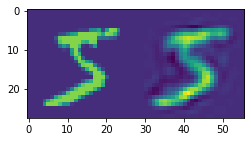

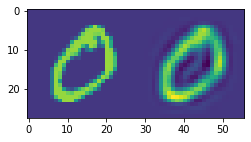

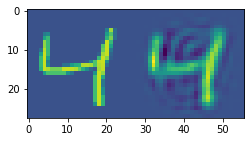

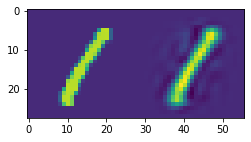

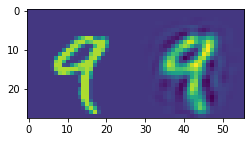

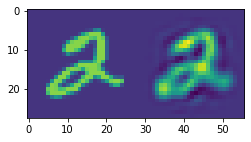

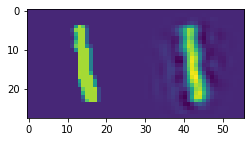

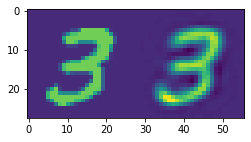

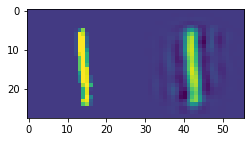

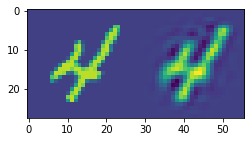

In [205]:
def side_by_side(indexes):
    org = X_train[indexes].reshape(28,28)
    rec = inv_sc[indexes].reshape(28,28)
    pair = np.concatenate((org, rec), axis=1)
    plt.figure(figsize=(4,2))
    plt.imshow(pair)
    plt.show()
    
for index in range(0,10):
    side_by_side(index)

Images with 154 dimensions are a little blurry, less defines pixels vs the images with 784 dimensions. 

#Experiment 5 

EXPERIMENT 5: We use a Random Forest classifier to get the relative importance of the 784 features (pixels) of the 28x28 dimensional images in training set of MNIST images and select the top 70 features (pixels). We train our 'best' dense neural network using these 70 features and compare its performance to the the dense neural network models from EXPERIMENTS 2 and 4.


In [215]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(x_train_norm,y_train_encoded)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

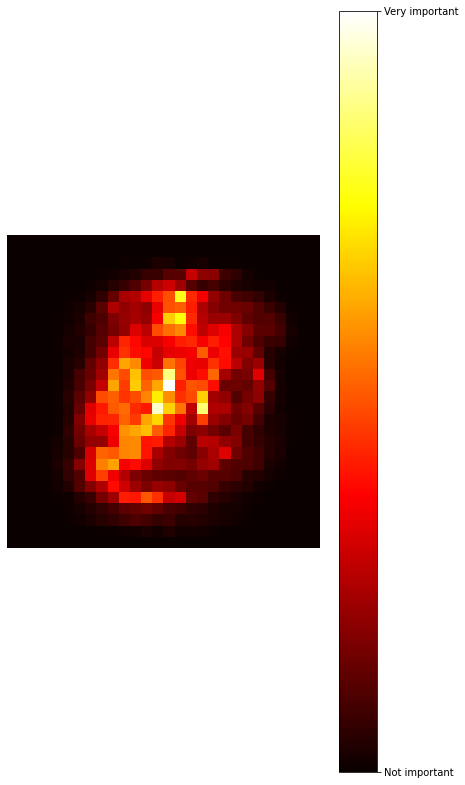

In [207]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = 'hot',
               interpolation="nearest")
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

In [208]:
n = 70
imp_arr = rnd_clf.feature_importances_
idx = (-imp_arr).argsort()[:n]          # get the indices of the 70 "most important" features/pixels
len(idx)

70

In [213]:
# Create training and test images using just the 70 pixel locations obtained above
train_images_sm = x_train_norm[:,idx]
test_images_sm = x_test_norm[:,idx]
train_images_sm.shape, test_images_sm.shape # the reduced images have dimension 70

((60000, 70), (10000, 70))

In [209]:
 #to convert an index n, 0<= n < 784
def pair(n,size):
    x = n//size 
    y = n%size
    return x,y

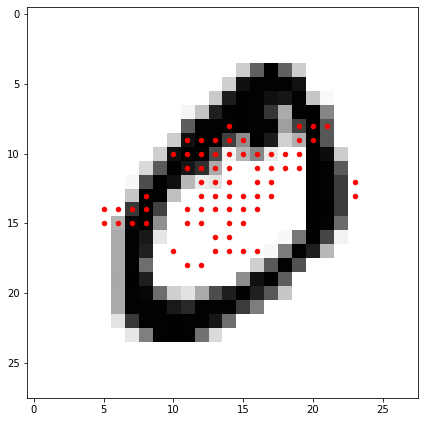

In [212]:

plt.imshow(X_train[1].reshape(28,28),cmap='binary')
x, y = np.array([pair(k,28) for k in idx]).T
plt.scatter(x,y,color='red',s=20)

Use these 70 features and compare its performance to the the dense neural network models from EXPERIMENTS 3 and 4.